In [210]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

DF_TOP_1000 = pd.read_csv('data/imdb_top_1000.csv').drop(columns=['Poster_Link'])

# Функция для исправления runtime
def runtime_fix(a):
    return a.replace(' min', '')

# Функция для удаления запятых
def deleting_comma(a):
    return str(a).replace(',', '')

df_movies = DF_TOP_1000.copy()

# Исправление ошибок датасета
df_movies['Released_Year'] = df_movies['Released_Year'].replace(to_replace='PG', value='1995')

# Преобразование полей датасета
df_movies.loc[:, 'Runtime'] = pd.to_numeric(df_movies['Runtime'].apply(runtime_fix))
df_movies.loc[:, 'Released_Year'] = pd.to_numeric(df_movies['Released_Year'])
df_movies.loc[:, 'IMDB_Rating'] = pd.to_numeric(df_movies['IMDB_Rating'])
df_movies.loc[:, 'Gross'] = df_movies['Gross'].apply(deleting_comma)

# Исключение записей с пустыми полями
df_movies = df_movies.drop(df_movies[df_movies.Gross == 'nan'].index).copy()


In [241]:
df_movies.sort_values('Released_Year').head()

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,Lustrum
127,The Kid,1921,Passed,68,"Comedy, Drama, Family",8.3,"The Tramp cares for an abandoned child, but ev...",NaN,Charles Chaplin,Charles Chaplin,Edna Purviance,Jackie Coogan,Carl Miller,113314,5450000,1920
194,Sherlock Jr.,1924,Passed,45,"Action, Comedy, Romance",8.2,"A film projectionist longs to be a detective, ...",NaN,Buster Keaton,Buster Keaton,Kathryn McGuire,Joe Keaton,Erwin Connelly,41985,977375,1920
193,The Gold Rush,1925,Passed,95,"Adventure, Comedy, Drama",8.2,A prospector goes to the Klondike in search of...,NaN,Charles Chaplin,Charles Chaplin,Mack Swain,Tom Murray,Henry Bergman,101053,5450000,1925
462,Bronenosets Potemkin,1925,NaN,75,"Drama, History, Thriller",8.0,In the midst of the Russian Revolution of 1905...,97.0,Sergei M. Eisenstein,Aleksandr Antonov,Vladimir Barskiy,Grigoriy Aleksandrov,Ivan Bobrov,53054,50970,1925
320,The General,1926,Passed,67,"Action, Adventure, Comedy",8.1,When Union spies steal an engineer's beloved l...,NaN,Clyde Bruckman,Buster Keaton,Buster Keaton,Marion Mack,Glen Cavender,81156,1033895,1925


In [212]:
df_movies = df_movies.drop(df_movies[df_movies.Gross == 'nan'].index).copy() # очищаем датасет от записей с пробелами
df_movies.head(3)

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Shawshank Redemption,1994,A,142,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469
1,The Godfather,1972,A,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411
2,The Dark Knight,2008,UA,152,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444


In [213]:
df_movies['Released_Year'] = pd.to_numeric(df_movies['Released_Year'], errors='coerce')


# Создание столбца с пятилетиями
df_movies['Lustrum'] = (df_movies['Released_Year'] // 5 * 5).astype('Int64')  # Находим пятилетия

# Группировка по пятилетиям и вычисление средней продолжительности
average_runtime_by_Lustrum = df_movies.groupby('Lustrum')['Runtime'].mean().reset_index()

# Переименовываем столбцы для удобства
average_runtime_by_Lustrum.columns = ['Lustrum', 'Average_Runtime']

# Сортируем результат
average_runtime_by_Lustrum = average_runtime_by_Lustrum.sort_values(by='Lustrum')

# Вывод результата
average_runtime_by_Lustrum

,Lustrum,Average_Runtime
0,1920,56.5
1,1925,99.0
2,1930,112.2
3,1935,117.75
4,1940,110.545455
5,1945,115.222222
6,1950,118.333333
7,1955,131.5625
8,1960,129.958333
9,1965,129.16


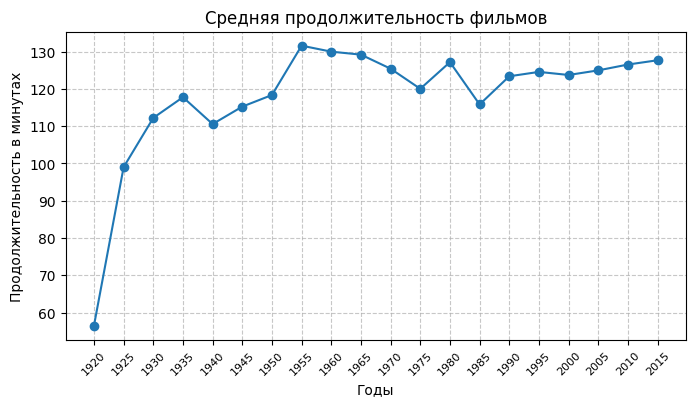

In [214]:
figure = plt.figure(figsize=(8, 4))
plt.plot(average_runtime_by_Lustrum['Lustrum'], 
         average_runtime_by_Lustrum['Average_Runtime'], marker = 'o')
plt.title('Средняя продолжительность фильмов')
plt.xlabel('Годы')
plt.ylabel('Продолжительность в минутах')
plt.xticks(range(min(average_runtime_by_Lustrum['Lustrum']), 
                 max(average_runtime_by_Lustrum['Lustrum']) + 1, 5), fontsize = 8, rotation = 45)
plt.grid(True, linestyle = '--', alpha = 0.7)

In [215]:
# Группируем по режиссёру и подсчитываем количество фильмов
director_movie_count = df_movies.groupby('Director').size().reset_index(name='Movie_Count')
director_movie_count['Director_Rating'] = (df_movies.groupby('Director')['IMDB_Rating'].mean().values)

director_movie_count = director_movie_count.sort_values(by='Movie_Count', ascending=0)

director_movie_count = director_movie_count.head(10)
director_movie_count

,Director,Movie_Count,Director_Rating
408,Steven Spielberg,13,8.030769
275,Martin Scorsese,10,8.170000
17,Alfred Hitchcock,9,8.144444
341,Quentin Tarantino,8,8.175000
73,Clint Eastwood,8,7.912500
86,David Fincher,8,8.037500
72,Christopher Nolan,8,8.462500
462,Woody Allen,8,7.800000
357,Rob Reiner,7,7.828571
158,Hayao Miyazaki,7,8.142857


C:\Users\karuz\AppData\Local\Temp\ipykernel_4920\3513709204.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


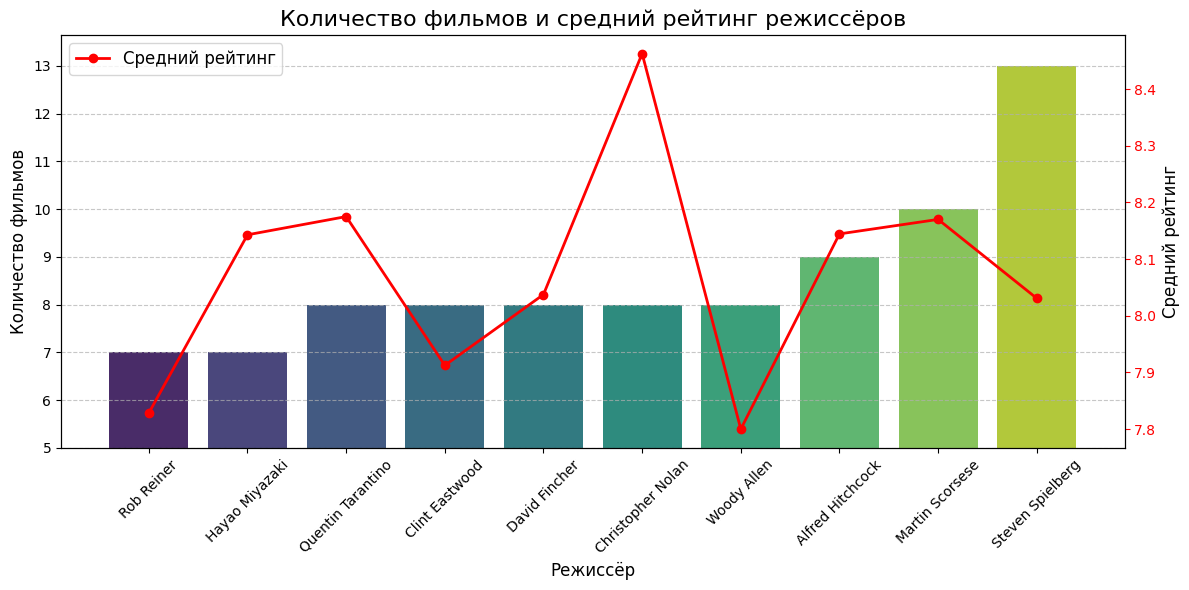

In [216]:
director_movie_count= director_movie_count.sort_values(by='Movie_Count', ascending=1)

# Создание фигуры и основной оси
fig, ax1 = plt.subplots(figsize=(12, 6))

# Построение столбчатой диаграммы на основной оси (количество фильмов)
sns.barplot(
    data=director_movie_count, 
    y='Movie_Count',  
    x='Director', 
    palette='viridis', 
    ax=ax1
)

# Настройка основной оси
ax1.set_title('Количество фильмов и средний рейтинг режиссёров', fontsize=16)
ax1.set_xlabel('Режиссёр', fontsize=12)
ax1.set_ylabel('Количество фильмов', fontsize=12)
ax1.tick_params(axis='x', rotation=45)
ax1.grid(axis='y', linestyle='--', alpha=0.7)
ax1.set_ylim(bottom=5)

# Создание второй оси
ax2 = ax1.twinx()

# Построение ломаной линии на второй оси (средний рейтинг)
ax2.plot(
    director_movie_count['Director'], 
    director_movie_count['Director_Rating'], 
    color='red', 
    marker='o', 
    linestyle='-', 
    linewidth=2, 
    label='Средний рейтинг'
)

# Настройка второй оси
ax2.set_ylabel('Средний рейтинг', fontsize=12)
ax2.tick_params(axis='y', colors='red')
ax2.legend(loc='upper left', fontsize=12)

# Показываем график
plt.tight_layout()
plt.show()


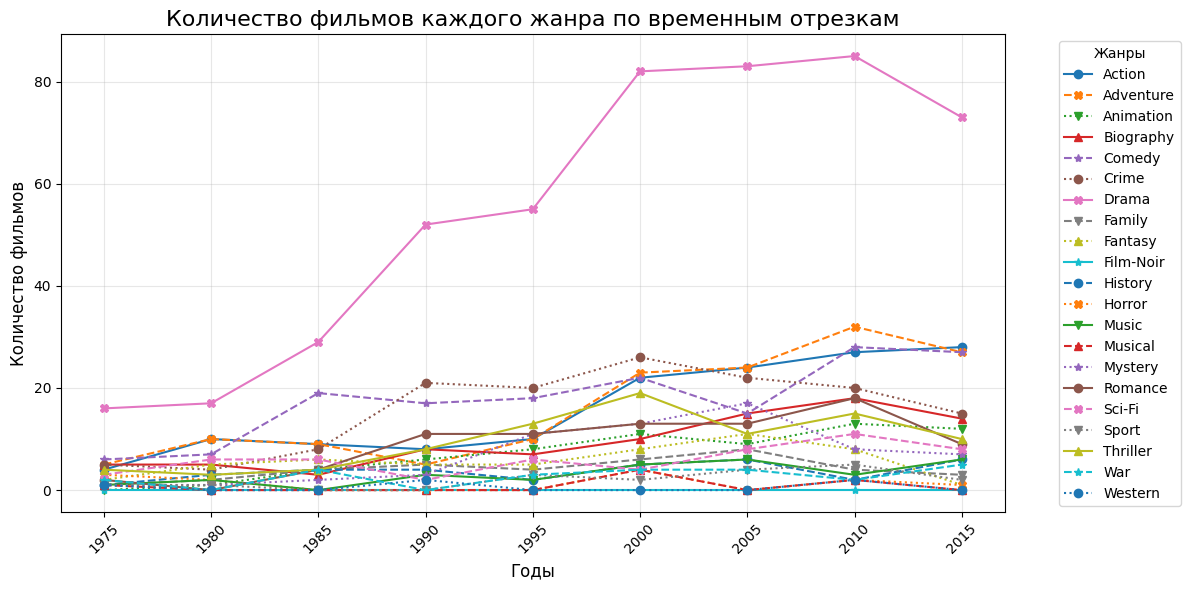

In [239]:
markers = ['o', 'X', 'v', '^', '*'] # отметки точек
linestyles = ['-', '--', ':'] # типы линий

# Удаляем фильмы с отсутствующим годом выпуска
df = df_movies.dropna(subset=['Released_Year'])

# Добавляем столбец с пятилетиями
df['Lustrum'] = (df['Released_Year'] // 5 * 5)

# Разделяем жанры на отдельные строки
df_genres = df.assign(Genre=df['Genre'].str.split(',')).explode('Genre')

# Убираем лишние пробелы
df_genres['Genre'] = df_genres['Genre'].str.strip()

# Группируем по пятилетиям и жанрам и считаем количество фильмов
genre_Lustrum_count = df_genres.groupby(['Lustrum', 'Genre']).size().reset_index(name='Movie_Count')

# Поворот данных для построения графика
pivot_data = genre_Lustrum_count.pivot(index='Lustrum', columns='Genre', values='Movie_Count').fillna(0).tail(9)

# Построение графика
plt.figure(figsize=(12, 6))

target = ['Comedy', 'Drama']

for idx, genre in enumerate(pivot_data.columns):
    plt.plot(pivot_data.index, pivot_data[genre], label=genre, linestyle=linestyles[idx % len(linestyles)], marker=markers[idx % len(markers)])

plt.title('Количество фильмов каждого жанра по временным отрезкам', fontsize=16)
plt.xlabel('Годы', fontsize=12)
plt.ylabel('Количество фильмов', fontsize=12)
plt.xticks(pivot_data.index, rotation=45)
plt.legend(title='Жанры', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


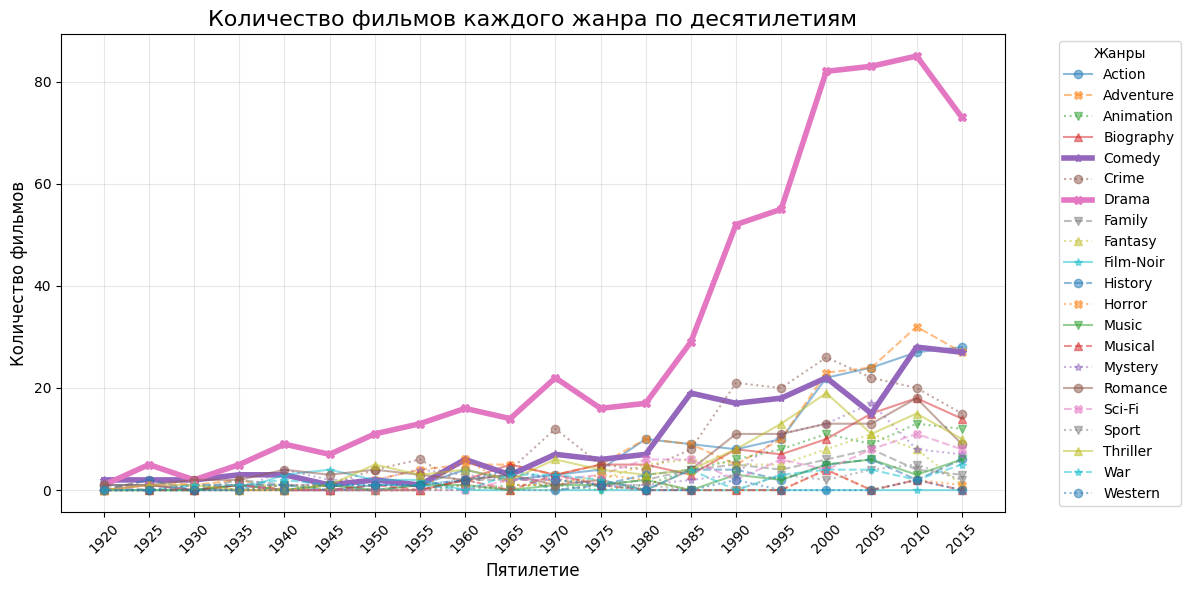

In [218]:
plt.figure(figsize=(12, 6))

target = ['Comedy', 'Drama']

for idx, genre in enumerate(pivot_data.columns):
    if genre in target:
        plt.plot(pivot_data.index, pivot_data[genre], label=genre, linewidth = 4, linestyle='-', marker=markers[idx % len(markers)])  # Ломаная линия для каждого жанра
    else:
        plt.plot(pivot_data.index, pivot_data[genre], label=genre, linestyle=linestyles[idx % len(linestyles)], marker=markers[idx % len(markers)], alpha = 0.5)

plt.title('Количество фильмов каждого жанра по десятилетиям', fontsize=16)
plt.xlabel('Пятилетие', fontsize=12)
plt.ylabel('Количество фильмов', fontsize=12)
plt.xticks(pivot_data.index, rotation=45)
plt.legend(title='Жанры', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


In [219]:
import tabulate
df_corr = df_movies.loc[:, ['Released_Year', 'Runtime', 'IMDB_Rating', 'Meta_score', 'Gross', 'No_of_Votes']].corr().copy()
df_corr

,Released_Year,Runtime,IMDB_Rating,Meta_score,Gross,No_of_Votes
Released_Year,1.000000,0.094814,-0.174931,-0.306420,0.233178,0.211428
Runtime,0.094814,1.000000,0.246756,-0.012211,0.139671,0.173205
IMDB_Rating,-0.174931,0.246756,1.000000,0.282690,0.095923,0.551261
Meta_score,-0.306420,-0.012211,0.282690,1.000000,-0.030587,0.010308
Gross,0.233178,0.139671,0.095923,-0.030587,1.000000,0.574393
No_of_Votes,0.211428,0.173205,0.551261,0.010308,0.574393,1.000000


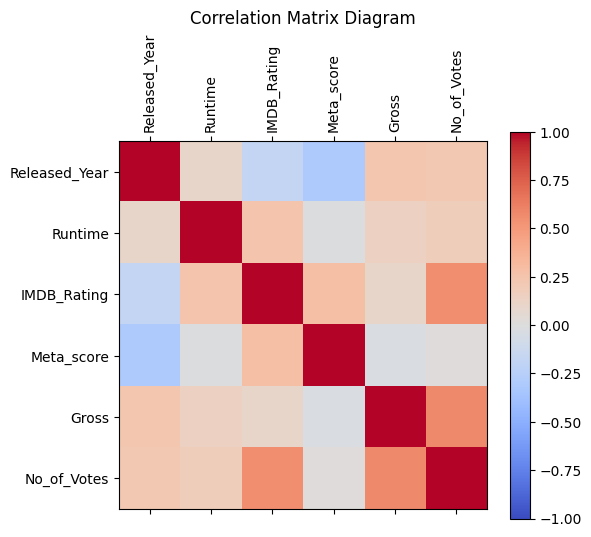

In [220]:
import matplotlib.pyplot as plt

# Создание фигуры и осей
figure = plt.figure(figsize=(6, 6))
axis = figure.add_subplot(111) # располагаем оси поверх фигуры
plt.title('Correlation Matrix Diagram')

# создаём корреляционную матрицу
corr_matrix = axis.matshow(df_corr, cmap = 'coolwarm', vmin=-1, vmax=1) # указываем максимальное и минимальное значение
colorbar = figure.colorbar(corr_matrix, shrink=0.8) # создаём цветововую панель справа

# настройк осей
axis.set_xticks(range(len(df_corr.columns))) # создание отметок на оси x числом количества компаний
axis.set_yticks(range(len(df_corr.index))) # создание отметок на оси y числом количества компаний
axis.set_xticklabels(df_corr.columns.array, rotation=90, fontsize=10) # отображение названий компаний, разворот названий на 90 градусов
axis.set_yticklabels(df_corr.index.array, fontsize=10) # отображение названий компаний, разворот названий

# отображение графика
plt.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


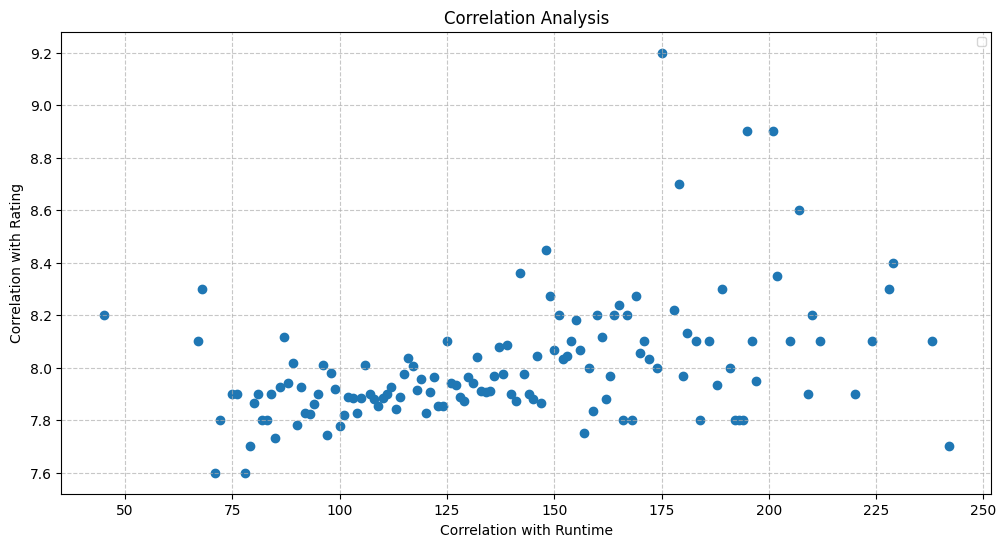

In [221]:
average_rating_by_runtime = df_movies.groupby('Runtime')['IMDB_Rating'].mean().reset_index()

figure = plt.figure(figsize=(12, 6))
plt.scatter(x=average_rating_by_runtime['Runtime'], y=average_rating_by_runtime['IMDB_Rating'])

plt.grid(linestyle='--', alpha=0.7)
plt.xlabel(f'Correlation with Runtime', fontsize=10)
plt.ylabel('Correlation with Rating', fontsize=10)
plt.title(f'Correlation Analysis', fontsize=12)
plt.legend(fontsize=8, loc='best')

In [222]:
average_rating_by_runtime = df_movies.groupby('Runtime')['IMDB_Rating'].mean().reset_index()
average_rating_by_runtime

,Runtime,IMDB_Rating
0,45,8.2
1,67,8.1
2,68,8.3
3,71,7.6
4,72,7.8
...,...,...
128,224,8.1
129,228,8.3
130,229,8.4
131,238,8.1


In [223]:
import pandas as pd

# Функция для удаления запятых из строк
def deleting_comma(a):
    return str(a).replace(',', '')

# Загрузка данных
DF_MOVIES = pd.read_csv('data/imdb-movies-dataset.csv').drop(columns=['Poster'])

# Удаление строк с пропущенными ключевыми полями
df_cleaned = DF_MOVIES.dropna(subset=['Year', 'Rating', 'Votes', 'Genre', 'Duration (min)']).copy()

# Преобразование столбцов Votes и Rating
df_cleaned.loc[:, 'Votes'] = pd.to_numeric(df_cleaned['Votes'].apply(deleting_comma))
df_cleaned.loc[:, 'Rating'] = pd.to_numeric(df_cleaned['Rating'].apply(deleting_comma))
df_cleaned.loc[:, 'Genre'] = df_cleaned['Genre']

# Фильтрация по порогу голосов
votes_threshold = 20000
df_cleaned = df_cleaned[df_cleaned['Votes'] >= votes_threshold].copy()

# Удаление дубликатов
df_cleaned = df_cleaned.drop_duplicates(subset=['Title', 'Year']).copy()

# Удаление фильмов с некорректной длительностью
df_cleaned = df_cleaned[df_cleaned['Duration (min)'] > 0].copy()

# Итоговый датафрейм
df_cleaned


,Title,Year,Certificate,Duration (min),Genre,Rating,Metascore,Director,Cast,Votes,Description,Review Count,Review Title,Review
0,The Idea of You,2023.0,R,115.0,"Comedy, Drama, Romance",6.4,67.0,Michael Showalter,"Anne Hathaway, Nicholas Galitzine, Ella Rubin,...",28744,"Solène, a 40-year-old single mom, begins an un...",166,Hypocrisy as an idea,"This film, as well as the reaction to it, is a..."
1,Kingdom of the Planet of the Apes,2023.0,PG-13,145.0,"Action, Adventure, Sci-Fi",7.3,66.0,Wes Ball,"Owen Teague, Freya Allan, Kevin Durand, Peter ...",22248,"Many years after the reign of Caesar, a young ...",183,A phenomenal start to another trilogy!,"I'm a big fan of all the planet of the apes, a..."
3,The Fall Guy,2023.0,PG-13,126.0,"Action, Comedy, Drama",7.3,73.0,David Leitch,"Ryan Gosling, Emily Blunt, Aaron Taylor-Johnso...",38953,A down-and-out stuntman must find the missing ...,384,Everything you needed and more!,Just got out of the Austin premier at SXSW and...
4,Challengers,2023.0,R,131.0,"Drama, Romance, Sport",7.7,82.0,Luca Guadagnino,"Zendaya, Mike Faist, Josh O'Connor, Darnell Ap...",32517,"Tashi, a former tennis prodigy turned coach, t...",194,"Watch ""Match Point"" instead",This is a tough one. I liked the concept and t...
5,Abigail,2023.0,R,109.0,"Horror, Thriller",6.8,62.0,Matt Bettinelli-Olpin,"Tyler Gillett, Melissa Barrera, Dan Stevens, A...",27284,After a group of criminals kidnap the ballerin...,168,Underwhelming and Unimpressive,Everything in this movie is mediocre except th...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9986,Happy-Go-Lucky,2020.0,R,118.0,"Comedy, Drama, Romance",7.0,84.0,Mike Leigh,"Sally Hawkins, Alexis Zegerman, Samuel Roukin,...",41082,"A look at a few chapters in the life of Poppy,...",162,A cheerful film with an underlying vein of tra...,Happy-Go-Lucky has been reviewed in the Britis...
9988,Godsend,2020.0,UA,102.0,"Action, Drama, Fantasy",4.8,24.0,Frank M. Calo,"Nick Hamm, Robert De Niro, Greg Kinnear, Rebec...",26491,A couple agree to have their deceased son clon...,151,"Not one to see twice, even with the cloning el...",I guess this film didn't really grip me. You k...
9989,No Man's Land,2020.0,R,98.0,"Comedy, Drama, War",7.9,84.0,Danis Tanovic,"Branko Djuric, Rene Bitorajac, Filip Sovagovic...",48864,Bosnia and Herzegovina during 1993 at the time...,163,"not a light-hearted chick-flick, but beautiful...",i hate it when reviews go over the plot in det...
9994,Mutiny on the Bounty,2020.0,U,132.0,"Adventure, Biography, Drama",7.6,87.0,Frank Lloyd,"Charles Laughton, Clark Gable, Franchot Tone, ...",24899,First mate Fletcher Christian leads a revolt a...,112,"Our Favorite ""Mutiny"": April 28, 1789",Although the versions with Marlon Brando and T...


Text(0.5, 1.0, 'Correlation Analysis')

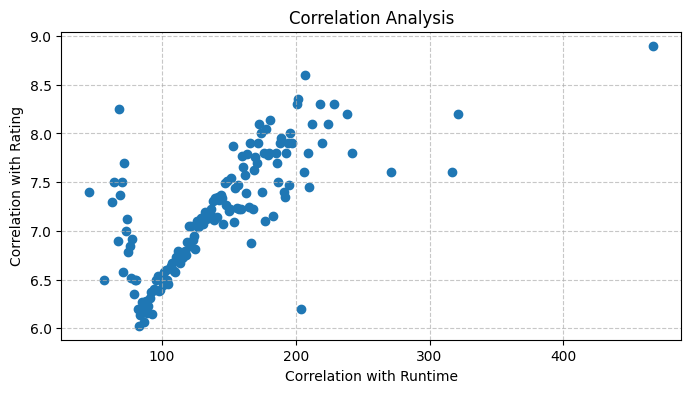

In [224]:
average_rating_by_runtime = df_cleaned.groupby('Duration (min)')['Rating'].mean().reset_index()

figure = plt.figure(figsize=(8, 4))
plt.scatter(x=average_rating_by_runtime['Duration (min)'], y=average_rating_by_runtime['Rating'])

plt.grid(linestyle='--', alpha=0.7)
plt.xlabel(f'Correlation with Runtime', fontsize=10)
plt.ylabel('Correlation with Rating', fontsize=10)
plt.title(f'Correlation Analysis', fontsize=12)

C:\Users\karuz\AppData\Local\Temp\ipykernel_4920\3467352023.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=average_rating_by_genre, y='Rating',  x='Genre', palette='viridis_r', orient = 'v')


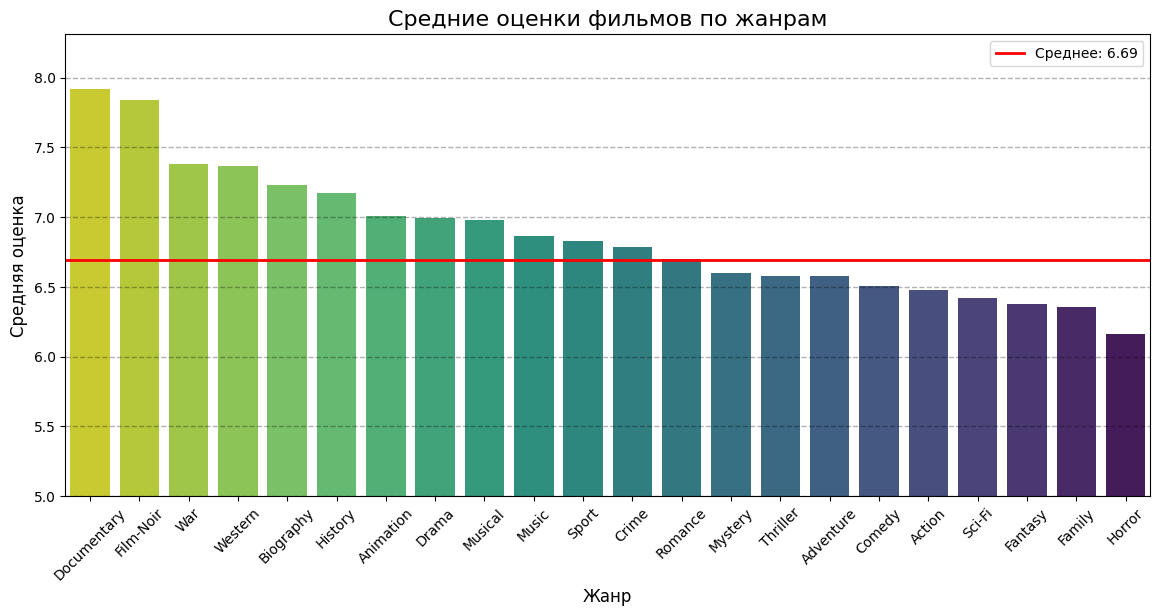

In [225]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Разделение жанров на отдельные строки
df_genres = df_cleaned.assign(Genre=df_cleaned['Genre'].str.split(',')).explode('Genre')

# Испраляем оплошность датасета
df_genres['Genre'] = df_genres['Genre'].replace(to_replace='Music', value='Musical')

# Удаление лишних пробелов в названиях жанров
df_genres['Genre'] = df_genres['Genre'].str.strip()

# Группировка по жанру и вычисление средней оценки
average_rating_by_genre = df_genres.groupby('Genre')['Rating'].mean().reset_index()

# Сортировка для удобного отображения
average_rating_by_genre = average_rating_by_genre.sort_values(by='Rating', ascending=0)

# Поиск среднего значения по всем фильмам
overall_mean_rating = df_cleaned['Rating'].mean()

# Построение гистограммы
plt.figure(figsize=(14, 6))
sns.barplot(data=average_rating_by_genre, y='Rating',  x='Genre', palette='viridis_r', orient = 'v')

# Построение линии среднего значения
plt.axhline(overall_mean_rating, color='red', linestyle='-', linewidth=2, label=f'Среднее: {overall_mean_rating:.2f}')

# Настройка графика
plt.title('Средние оценки фильмов по жанрам', fontsize=16)
plt.xticks(rotation = 45)
plt.xlabel('Жанр', fontsize=12)
plt.ylabel('Средняя оценка', fontsize=12)
plt.ylim(bottom = 5)
plt.grid(axis= 'y', linestyle = '--', linewidth = 1, color = 'black', alpha = 0.3)
plt.legend()
plt.show()


In [226]:
average_rating_by_genre.head(3)

,Genre,Rating
6,Documentary,7.916216
10,Film-Noir,7.841379
20,War,7.379661


In [227]:
df_corr = df_cleaned.loc[:, ['Duration (min)', 'Rating', 'Votes', 'Metascore']].corr().copy()
df_corr

,Duration (min),Rating,Votes,Metascore
Duration (min),1.000000,0.356468,0.262574,0.249546
Rating,0.356468,1.000000,0.381528,0.747710
Votes,0.262574,0.381528,1.000000,0.240361
Metascore,0.249546,0.747710,0.240361,1.000000


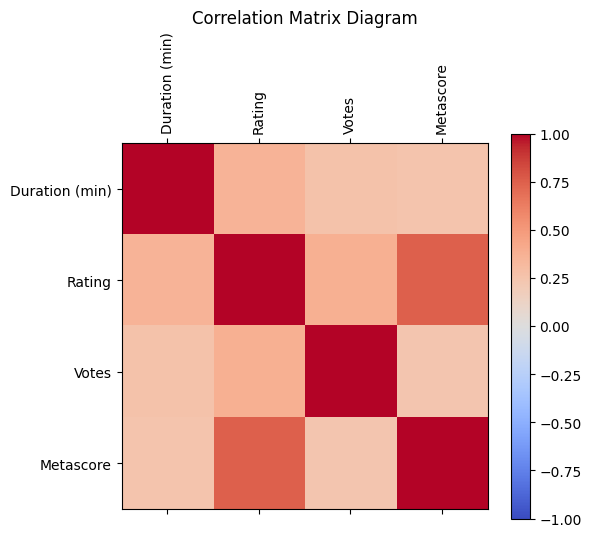

In [228]:
import matplotlib.pyplot as plt

# Создание фигуры и осей
figure = plt.figure(figsize=(6, 6))
axis = figure.add_subplot(111) # располагаем оси поверх фигуры
plt.title('Correlation Matrix Diagram')

# создаём корреляционную матрицу
corr_matrix = axis.matshow(df_corr, cmap = 'coolwarm', vmin=-1, vmax=1) # указываем максимальное и минимальное значение

colorbar = figure.colorbar(corr_matrix, shrink=0.8) # создаём цветововую панель справа

# настройк осей
axis.set_xticks(range(len(df_corr.columns))) # создание отметок на оси x числом количества компаний
axis.set_yticks(range(len(df_corr.index))) # создание отметок на оси y числом количества компаний
axis.set_xticklabels(df_corr.columns.array, rotation=90, fontsize=10) # отображение названий компаний, разворот названий на 90 градусов
axis.set_yticklabels(df_corr.index.array, fontsize=10) # отображение названий компаний, разворот названий

# отображение графика
plt.tight_layout()
plt.show()

In [229]:
# Группируем по режиссёру и подсчитываем количество фильмов
director_movie_count_2 = df_cleaned.groupby('Director').size().reset_index(name='Movie_Count')
director_movie_count_2['Director_Rating'] = (df_cleaned.groupby('Director')['Rating'].mean().values)  # Находим десятилетие

# Сортируем по количеству фильмов в убывающем порядке
director_movie_count_2 = director_movie_count_2.sort_values(['Movie_Count', 'Director_Rating'], ascending=[0,0])
# Сортируем по количеству фильмов в возрастающем порядке
director_movie_count_2 = director_movie_count_2.sort_values(by='Movie_Count')
director_movie_count_2 = director_movie_count_2.tail(10)
director_movie_count_2

,Director,Movie_Count,Director_Rating
2240,Tim Burton,19,7.005263
1946,Robert Zemeckis,19,7.036842
2390,Woody Allen,21,7.119048
2173,Steven Soderbergh,21,6.771429
1973,Ron Howard,21,7.028571
87,Alfred Hitchcock,23,7.678261
1485,Martin Scorsese,23,7.695652
1889,Ridley Scott,27,7.014815
424,Clint Eastwood,31,7.093548
2174,Steven Spielberg,32,7.409375


C:\Users\karuz\AppData\Local\Temp\ipykernel_4920\2255956285.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


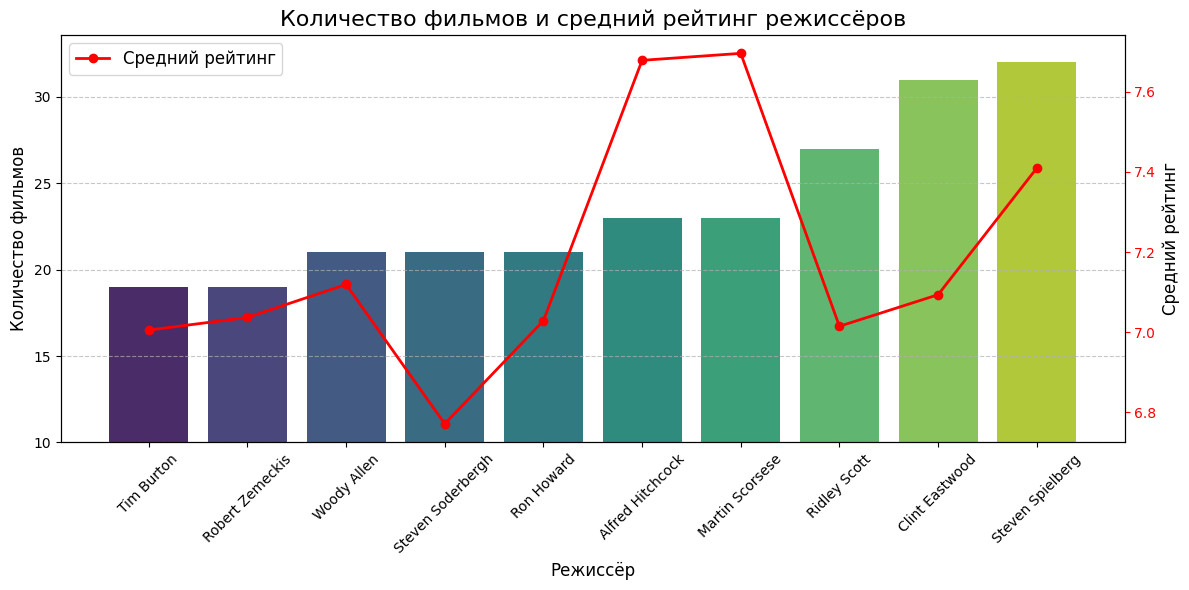

In [243]:
import matplotlib.pyplot as plt
import seaborn as sns

# Убедимся, что данные отсортированы одинаково
director_movie_count_2 = director_movie_count_2.sort_values(by='Movie_Count')

# Создание фигуры и основной оси
fig, ax1 = plt.subplots(figsize=(12, 6))

# Построение столбчатой диаграммы на основной оси (количество фильмов)
sns.barplot(
    data=director_movie_count_2, 
    y='Movie_Count',  
    x='Director', 
    palette='viridis', 
    ax=ax1
)

# Настройка основной оси
ax1.set_title('Количество фильмов и средний рейтинг режиссёров', fontsize=16)
ax1.set_xlabel('Режиссёр', fontsize=12)
ax1.set_ylabel('Количество фильмов', fontsize=12)
ax1.tick_params(axis='x', rotation=45)
ax1.grid(axis='y', linestyle='--', alpha=0.7)
ax1.set_ylim(bottom=10)

# Создание второй оси
ax2 = ax1.twinx()

# Построение ломаной линии на второй оси (средний рейтинг)
ax2.plot(
    director_movie_count_2['Director'], 
    director_movie_count_2['Director_Rating'], 
    color='red', 
    marker='o', 
    linestyle='-', 
    linewidth=2, 
    label='Средний рейтинг'
)

# Настройка второй оси
ax2.set_ylabel('Средний рейтинг', fontsize=12)
ax2.tick_params(axis='y', colors='red')
ax2.legend(loc='upper left', fontsize=12)

# Показываем график
plt.tight_layout()
plt.show()
